w[0]: 0.393906  b: -0.031804


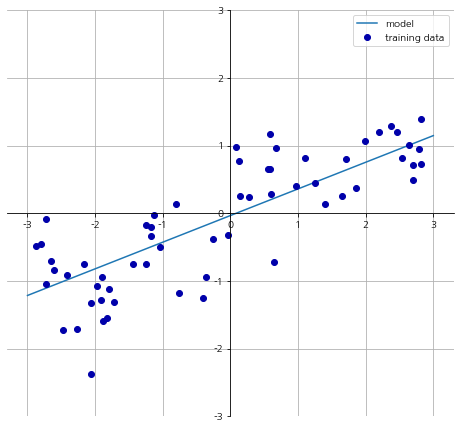

In [28]:
#2 선형 모델 => 역사 깊고 인기 있는 모델 => 제약이 많아 보여도 특성 잘 표현 => 과대적합 경계
import mglearn
import matplotlib.pyplot as plt
mglearn.plots.plot_linear_regression_wave()
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
import warnings
warnings.simplefilter("ignore")

In [6]:
##1 선형회귀(최소제곱법)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

print("회귀 계수: %.2f " % lr.coef_)
print("회귀 절편: %.2f" % lr.intercept_) #_표현이유는 직접 만든 매개변수가 아니라 구해진 특성이기 때문에

print("훈련 세트 점수: %.2f" % lr.score(X_train,y_train))
print('테스트 세트 점수: %.2f' % lr.score(X_test,y_test))


회귀 계수: 0.39 
회귀 절편: -0.03
훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [7]:
#훈련세트랑 테스트 세트 r^2 스코어가 비슷함 => 특성갯수가 너무 적어서 과소적합

In [8]:
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test, y_train,y_test = train_test_split(X,y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

print("훈련 세트 점수: %.2f" % lr.score(X_train, y_train))
print("테스트 세트 점수: %.2f" % lr.score(X_test,y_test) )

훈련 세트 점수: 0.94
테스트 세트 점수: 0.78


In [10]:
#과대적합이 이루어짐 => 복잡도 제어할 수 있는 모델 구축 필요

In [11]:
##2. 리지회귀
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("훈련 세트 점수: %.2f" % ridge.score(X_train,y_train))
print('테스트 세트 점수: %.2f' % ridge.score(X_test,y_test))

훈련 세트 점수: 0.87
테스트 세트 점수: 0.81


In [12]:
#훈련세트는 낮아졌지만 테스트 세트가 올라감을 볼 수 있다:) => 더 일반화된 모델

In [13]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수: %.2f" % ridge10.score(X_train,y_train))
print('테스트 세트 점수: %.2f' % ridge10.score(X_test,y_test))

훈련 세트 점수: 0.77
테스트 세트 점수: 0.73


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수: %.2f" % ridge01.score(X_train,y_train))
print('테스트 세트 점수: %.2f' % ridge01.score(X_test,y_test))

훈련 세트 점수: 0.92
테스트 세트 점수: 0.82


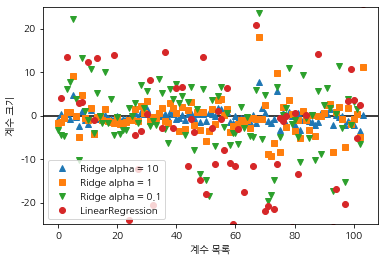

In [15]:
#알파가 0.1일때 좋은 성능을 냄
plt.plot(ridge10.coef_, "^", label="Ridge alpha = 10")
plt.plot(ridge.coef_, "s", label="Ridge alpha = 1")
plt.plot(ridge01.coef_, "v", label="Ridge alpha = 0.1")

plt.plot(lr.coef_,"o", label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims  = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

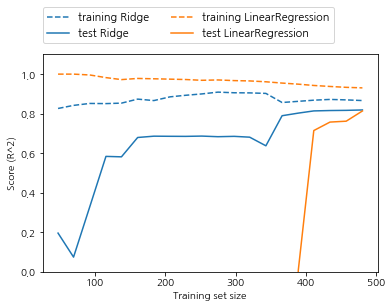

In [16]:
#학습곡선
mglearn.plots.plot_ridge_n_samples()

In [20]:
#3. 라소 => 완전히 제외되는 특성이 있어서 변수선택 특징 강함
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: %.2f" % lasso.score(X_train, y_train))
print("테스트 세트 점수: %.2f" % lasso.score(X_test, y_test))
print("사용한 특성 갯수: %d" % np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.27
테스트 세트 점수: 0.26
사용한 특성 갯수: 3


In [23]:
lasso001 = Lasso(alpha=0.1, max_iter=10000).fit(X_train,y_train) #max_iter값늘려줘야 경사하강법으로 최적의 계수 찾을 수 있음
print("훈련 세트 점수: %.2f" % lasso001.score(X_train, y_train))
print("테스트 세트 점수: %.2f" % lasso001.score(X_test, y_test))
print("사용한 특성 갯수: %d" % np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.75
테스트 세트 점수: 0.70
사용한 특성 갯수: 12


In [25]:
lasso00001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train,y_train) #max_iter값늘려줘야 경사하강법으로 최적의 계수 찾을 수 있음
print("훈련 세트 점수: %.2f" % lasso00001.score(X_train, y_train))
print("테스트 세트 점수: %.2f" % lasso00001.score(X_test, y_test))
print("사용한 특성 갯수: %d" % np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.82
사용한 특성 갯수: 73


(-25, 25)

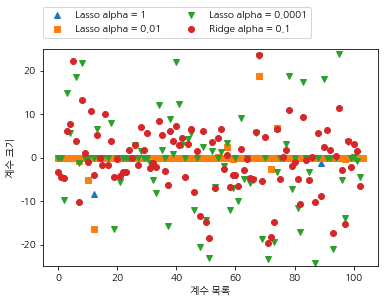

In [26]:
plt.plot(lasso.coef_, "^", label="Lasso alpha = 1")
plt.plot(lasso001.coef_, "s", label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha = 0.0001")

plt.plot(ridge01.coef_,"o", label="Ridge alpha = 0.1")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)

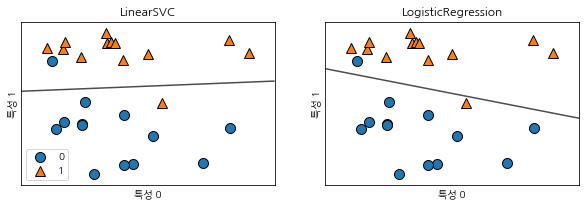

In [30]:
##분류용 선형 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig,axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression(),], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

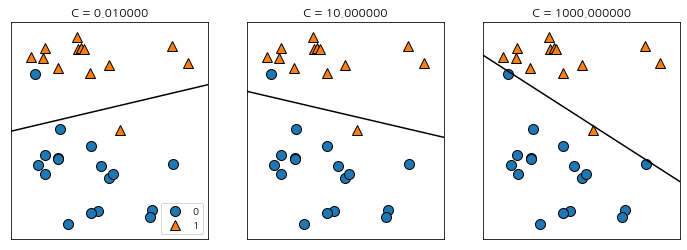

In [31]:
mglearn.plots.plot_linear_svc_regularization()

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)

print("훈련 세트 점수: %.3f" % logreg.score(X_train, y_train))
print("테스트 세트 점수 %.3f" % logreg.score(X_test, y_test))

훈련 세트 점수: 0.944
테스트 세트 점수 0.958


In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("훈련 세트 점수: %.3f" % logreg100.score(X_train, y_train))
print("테스트 세트 점수: %3.f" % logreg100.score(X_test,y_test))

훈련 세트 점수: 0.958
테스트 세트 점수:   1


In [35]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("훈련 세트 점수: %3.f" % logreg001.score(X_train, y_train))
print("테스트 세트 점수: %3.f  " % logreg001.score(X_test,y_test))

훈련 세트 점수:   1
테스트 세트 점수:   1  


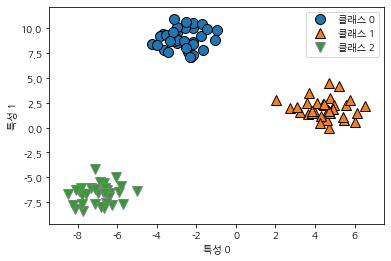

In [36]:
#다중 클래스 분류용 모델
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel('특성 1')
plt.legend(["클래스 0", "클래스 1","클래스 2"])

In [38]:
linear_svm = LinearSVC().fit(X,y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print('절편 배열의 크기: ', linear_svm.intercept_.shape)


계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


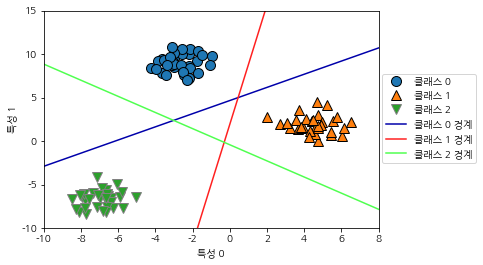

In [41]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01,0.3))

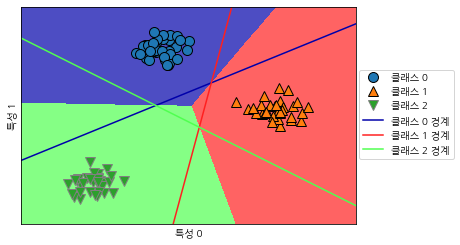

In [42]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept) / coef[1], c=color)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(["클래스 0", "클래스 1", "클래스 2", "클래스 0 경계","클래스 1 경계","클래스 2 경계"], loc=(1.01,0.3))